In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [2]:
raw_data = {'age':[27, 47, 32, 24, 45, 56, 31, 23, 42, 32],
            'gender':['male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female'],
            'income':[150000, 300000, 120000, 450000, 300000, 320000, 150000, 300000, 230000, 420000],
            'married':['no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes'],
            'buy':[0, 1, 0, 1, 0, 1, 0, 0, 0, 1]}
df_raw_data = pd.DataFrame(raw_data)
df_raw_data

,age,gender,income,married,buy
0,27,male,150000,no,0
1,47,female,300000,yes,1
2,32,male,120000,no,0
3,24,male,450000,no,1
4,45,male,300000,yes,0
5,56,male,320000,yes,1
6,31,male,150000,no,0
7,23,female,300000,yes,0
8,42,male,230000,no,0
9,32,female,420000,yes,1


In [3]:
predict_data = {'age':[40],
                'gender_male':[0],
                'income':[310000],
                'married_yes':[0]}
df_predict_data = pd.DataFrame(predict_data)
df_predict_data

,age,gender_male,income,married_yes
0,40,0,310000,0


### Transform the Categorical Variables by Creating Dummy Variables

In [4]:
df_raw_data_dummy = pd.get_dummies(df_raw_data, columns=['gender', 'married'], drop_first=True)

In [5]:
# # Transform the Numerical Variables by Scaling

# scaler = StandardScaler()
# df_numeric_scaled = scaler.fit_transform(df_raw_data[['age', 'income']])

### Split Training and Testing Datasets

In [6]:
random_seed = 888
df_train, df_test = train_test_split(df_raw_data_dummy, test_size=0.2, random_state=random_seed, stratify=df_raw_data_dummy['buy'])

### Transform the Numerical Variables by Scaling

In [7]:
# def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):

scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(df_train[['age', 'income']])
X_categorical = df_train[['gender_male', 'married_yes']].to_numpy()
X_train = np.hstack((X_categorical, X_numeric_scaled))
y_train = df_train['buy']

# X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

### Fit the Logistic Regression Model

In [8]:
clf = LogisticRegression(multi_class='ovr', solver='liblinear') # logistic regression with no penalty term in the cost function.
clf.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

### Evaluate the Model

In [9]:
scaler = StandardScaler()
X_numeric_scaled_test = scaler.fit_transform(df_test[['age', 'income']])
X_categorical_test = df_test[['gender_male', 'married_yes']].to_numpy()
X_test = np.hstack((X_categorical_test, X_numeric_scaled_test))
y_test = df_test['buy']

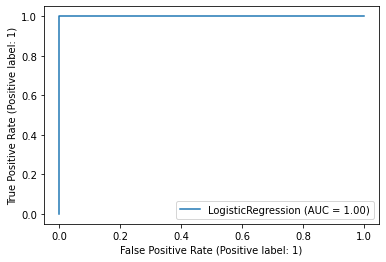

In [10]:
# ROC curve
plot_roc_curve(clf, X_test, y_test)

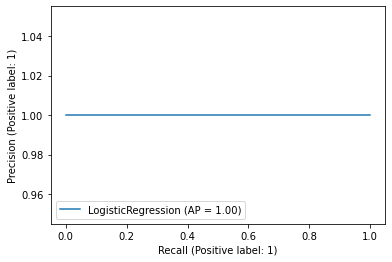

In [11]:
# precision-recall curve
plot_precision_recall_curve(clf, X_test, y_test)

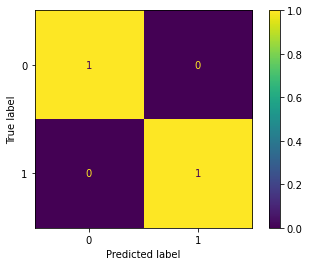

In [12]:
# Confusion Matrix
plot_confusion_matrix(clf, X_test, y_test)

In [13]:
test_prob = clf.predict_proba(X_test)[:, 1]
print('Probility: ', test_prob)
print()
test_pred = clf.predict(X_test)
print('Prediction:' , test_pred)
print()

Probility:  [0.54566107 0.28165065]

Prediction: [1 0]



In [14]:
# Evaluation Metrics

print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.46828
AUC = 1.00000
Average Precision = 1.00000

Using 0.5 as threshold:
Accuracy = 1.00000
Precision = 1.00000
Recall = 1.00000
F1 score = 1.00000

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### Make Prediction on Out-of-Sample Data

In [15]:
scaler = StandardScaler()
X_numeric_scaled_predict = scaler.fit_transform(df_predict_data[['age', 'income']])
X_categorical_predict = df_predict_data[['gender_male', 'married_yes']].to_numpy()
X_predict = np.hstack((X_categorical_predict, X_numeric_scaled_predict))

In [16]:
predict_prob = clf.predict_proba(X_predict)[:, 1]
print('Probility: ', predict_prob)
print()
predict_pred = clf.predict(X_predict)
print('Prediction:' , predict_pred)
print()

Probility:  [0.41122876]

Prediction: [0]

